# Práctica 1 - Self-Organising Maps - COLORES
## Preparación de entorno
#### Importar librerías de código

In [10]:
# from __future__ import division

import numpy as np
from matplotlib import pyplot as plt
from matplotlib import patches as patches
from sklearn import preprocessing # La usaremos para la normalización (mas fácil)

%matplotlib inline

#### Dataset que se va a utilizar para el entrenamiento

In [11]:
# Código para obtener el Dataset que se va a usar en el entrenamiento
valor_min = 0
valor_max = 256 # Usamos el 256 porque si no el 255 no lo coje
valores_color = 3 # 3 valores por cada color RGB
num_colores = 100
datos = np.random.randint(valor_min, valor_max, (valores_color, num_colores))

## SOM Setup
#### Variables definidas por el alumno

In [12]:
# Inicializa tamaño del mapa de Kohonen, número de iteraciones y learning rate
# Inicializa normalizar_datos dependiendo de si tienes que normalizar los datos o no
lado_mapa = 7
periodo = num_colores*10
learning_rate = 0.1 # Entre 0,1 y 0,3
normalizar_datos = True # Queremos normalizar los datos en nuestro caso

#### A partir de este punto solo hay cálculos. No se introducen más valores "a mano"

In [13]:
# Establece el numero de entradas del mapa y el número de datos que se van a usar para entrenar. 
# Utiliza una función que obtenga automáticamente los valores a partir del Dataset.
num_entradas = valores_color
num_datos = num_colores

# Calcula el vecindario inicial. Debe ser la mitad del lado del mapa de Kohonen
vecindario = int(lado_mapa/2)

# Normaliza los datos si fuese necesario dividiendo cada dato por el máximo en la matriz
if normalizar_datos:
    datos = preprocessing.normalize(datos)
    
# Crea una matriz de pesos con valores random entre 0 y 1. Usa la función random.random de la librería NumPy
matriz_pesos = np.random.random((lado_mapa,lado_mapa,valores_color)) # Matriz tridimensional de forma (Xpos,Ypos,CodigoRGB)

#### Funciones para entrenar/clasificar

In [14]:
# Función para encontrar la BMU
"""
   Encuentra la BMU para un patrón de entrada.
   Entradas: (patrón_de_entrada, matriz_de_pesos, número_de_entradas)
   Salidas:  (bmu, bmu_idx) tupla donde
               bmu: vector de pesos de la neurona ganadora
               bum_idx: coordenadas de la neurona ganadora
"""
def calcular_bmu(patron_entrada, m_pesos, m):
   ganadora = 2000
   row = len(m_pesos)
   col = len(m_pesos)
   vectorPesos = []
   for x in range(row):
      for y in range(col):
         for z in range(m):
            vectorPesos.append(m_pesos[x][y][z])
         dist = np.linalg.norm(np.array(vectorPesos) - np.array(patron_entrada))
         if dist < ganadora:
            ganadora = dist
            bmu = vectorPesos
            bmu_idx = np.stack((x,y))
         vectorPesos = []
   print(bmu)
   print(bmu_idx)

   return bmu, bmu_idx


# calcular_bmu([0,1,0], matriz_pesos, num_entradas)

In [15]:
# Función para calcular el descenso del coeficiente de aprendizaje (eta)

#   Calcula el Learning Rate (eta) que corresponde a la i-ésima presentación.
#   Entradas: (learning_rate_inicial, iteracion, período)
#   Salidas:  learning_rate para la iteración i

def variacion_learning_rate(lr_inicial, i, n_iteraciones):
   return lr_inicial * (1 - i/n_iteraciones)

In [16]:
# Función para calcular el descenso del vecindario (v)

#   Calcula el vecindario  (v) que corresponde a la i-ésima presentación.
#   Entradas: (vecindario_inicial, iteracion, período)
#   Salidas:  lvecindario para la iteración i

def variacion_vecindario(vecindario_inicial, i, n_iteraciones):
      return 1 + vecindario_inicial * (1 - i/n_iteraciones)

In [17]:
# Función para calcular el descenso del coeficiente de aprendizaje (eta) en función de la distancia a la BMU

#   Calcula la amortiguación de eta en función de la distancia en el mapa entre una neurona y la BMU.
#   Entradas: (distancia_BMU, vecindario_actual)
#   Salidas:  amortiguación para la iteración

def decay(distancia_BMU, vecindario_actual):
   return np.exp(-distancia_BMU**2 / (2*vecindario_actual**2))

#### Funciones para dibujar la salida de la red

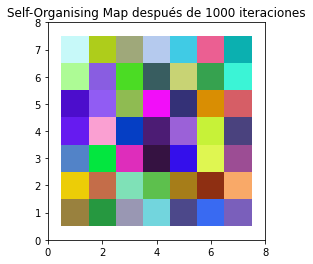

In [19]:
# Función para pintar una matriz de valores como colores RGB
def pintar_mapa(matriz_valores):
    fig = plt.figure()
    
    # Establece ejes
    ax = fig.add_subplot(111, aspect='equal')
    ax.set_xlim((0, matriz_pesos.shape[0]+1))
    ax.set_ylim((0, matriz_pesos.shape[1]+1))
    ax.set_title('Self-Organising Map después de %d iteraciones' % periodo)

    # Dibuja los rectángulos de color RGB
    for x in range(1, matriz_valores.shape[0] + 1):
        for y in range(1, matriz_valores.shape[1] + 1):
            ax.add_patch(patches.Rectangle((x-0.5, y-0.5), 1, 1,
                         facecolor=matriz_valores[x-1,y-1,:],
                         edgecolor='none'))
    plt.show()

# pintar_mapa(matriz_pesos)

## SOM Entrenamiento

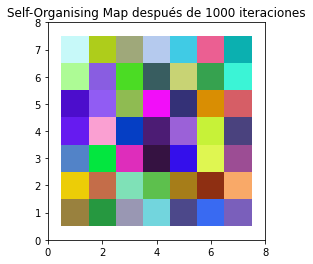

0


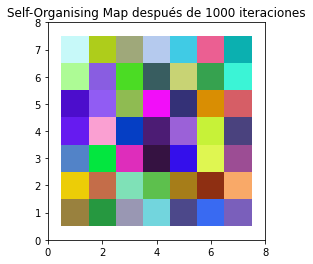

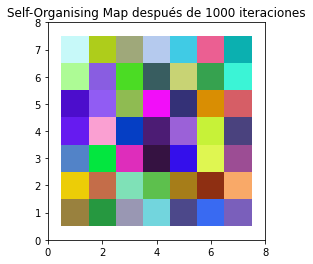

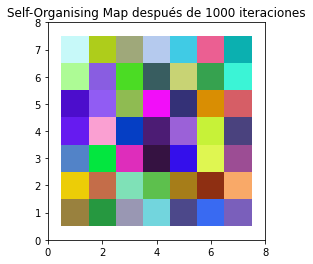

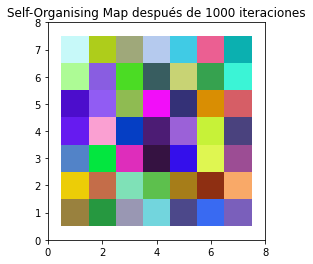

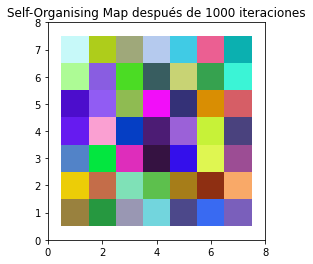

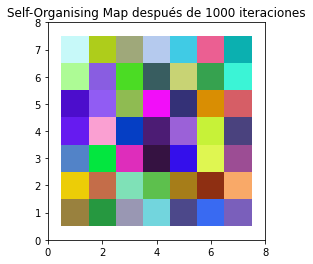

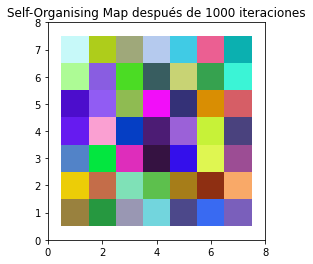

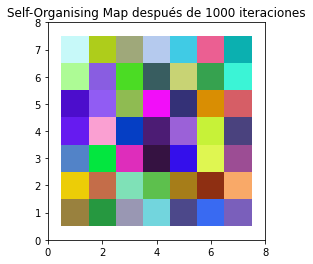

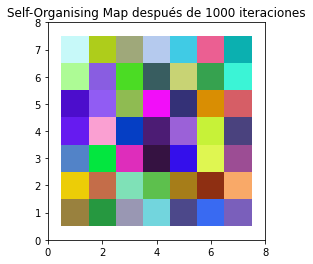

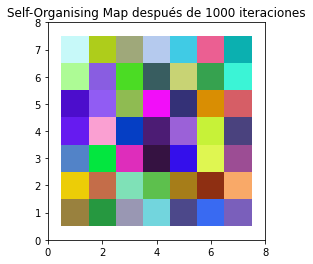

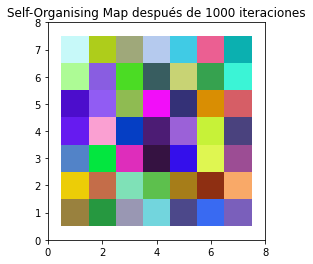

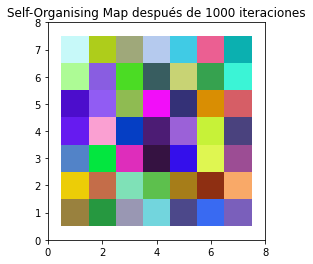

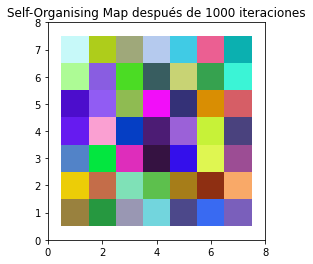

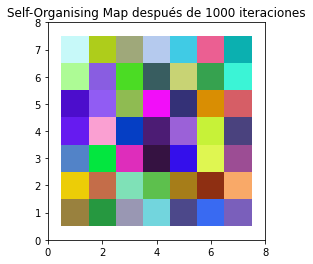

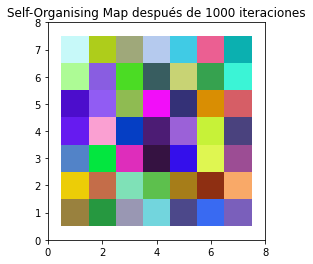

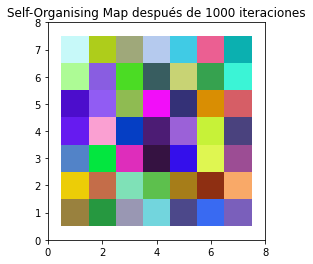

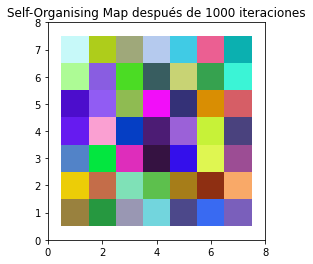

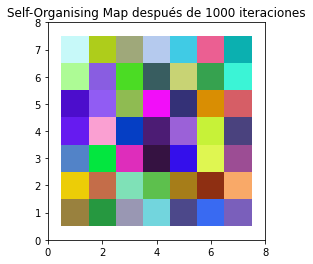

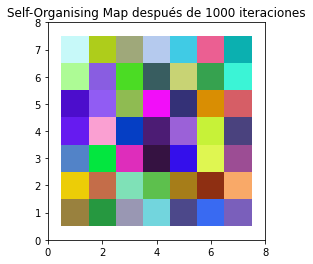

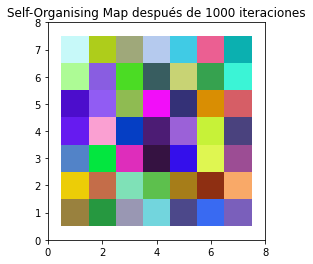

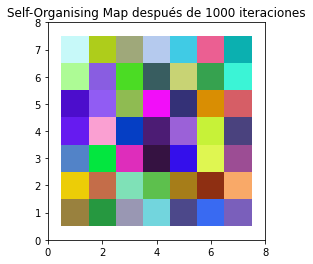

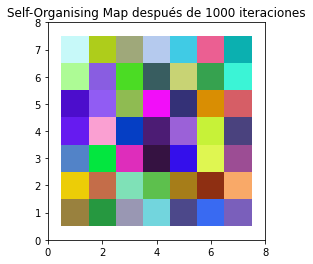

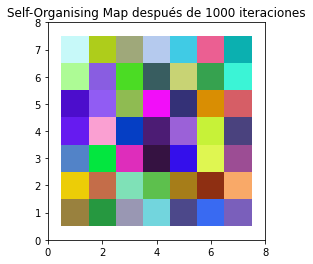

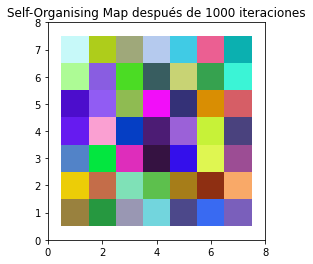

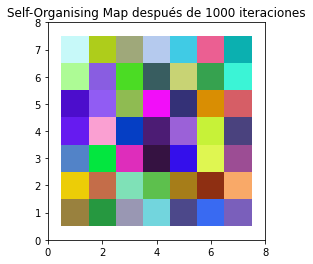

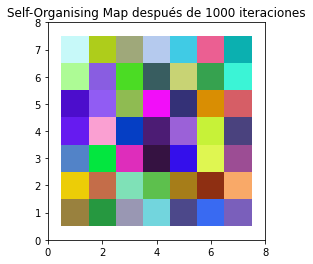

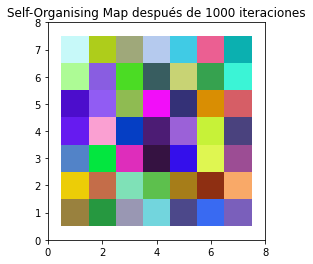

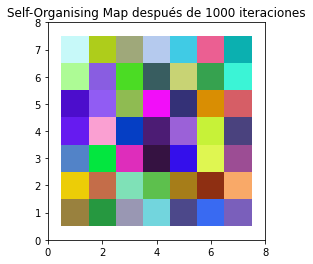

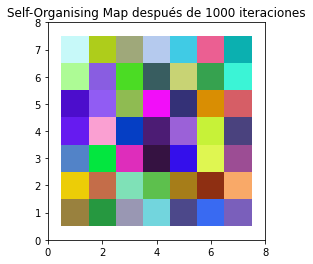

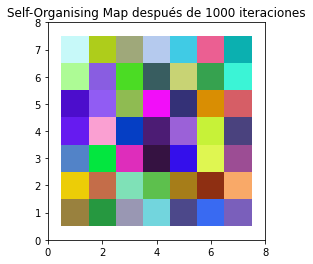

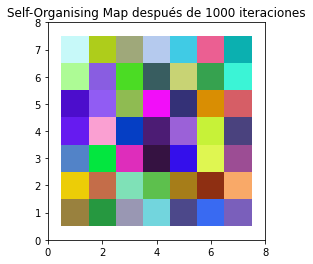

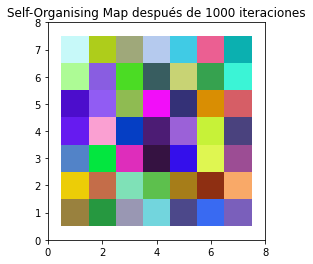

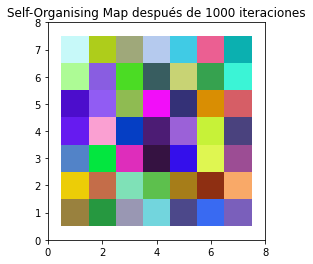

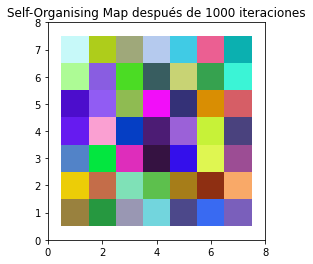

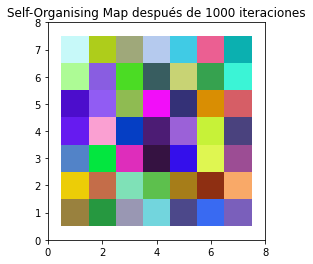

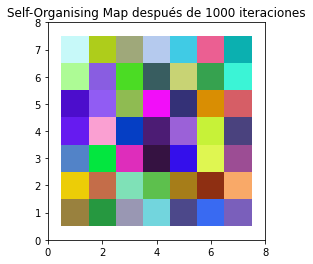

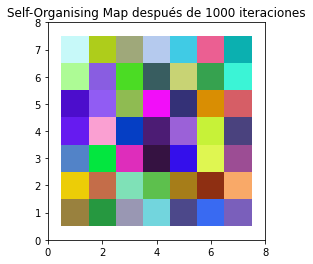

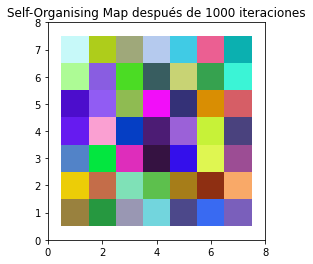

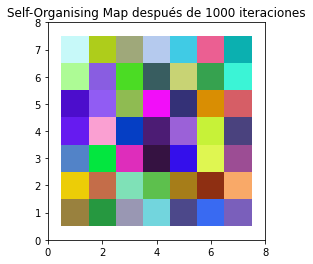

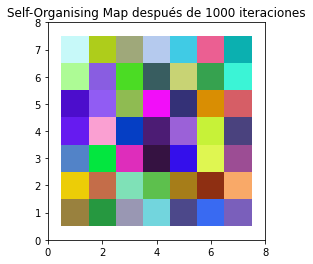

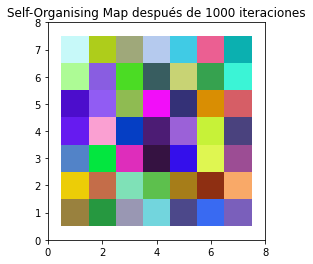

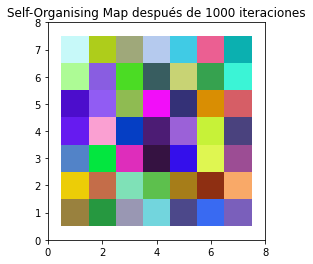

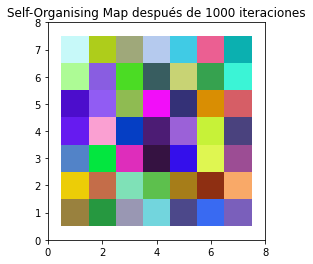

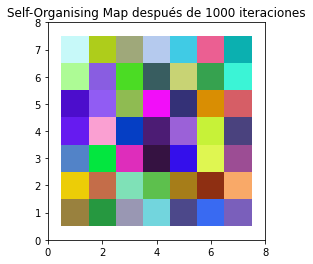

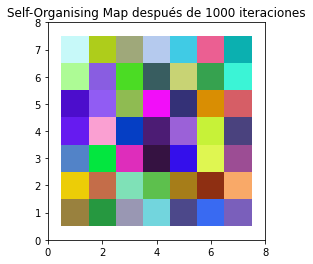

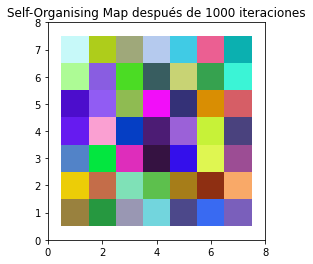

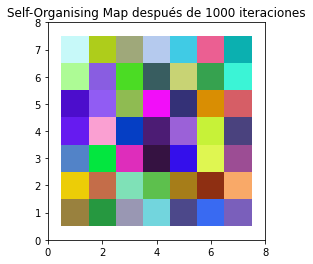

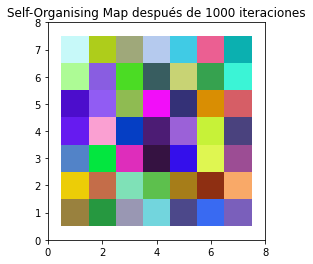

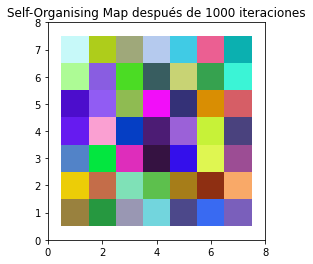

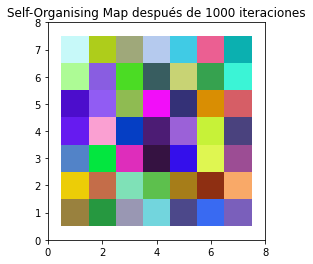

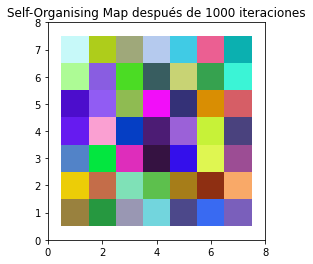

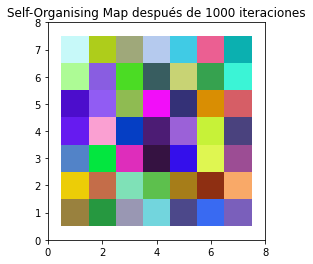

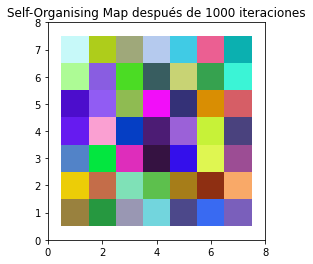

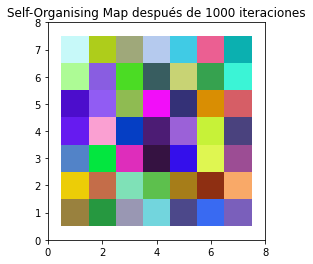

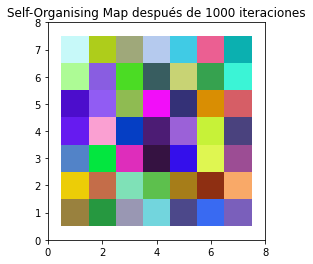

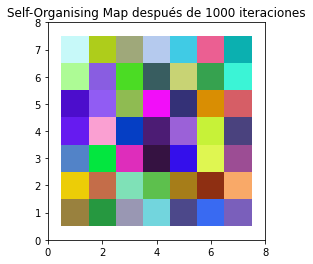

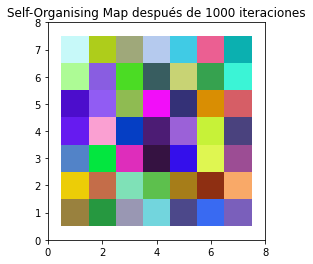

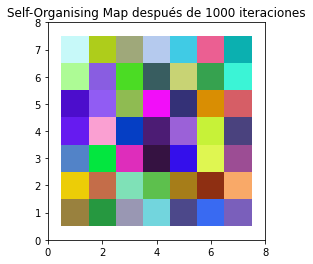

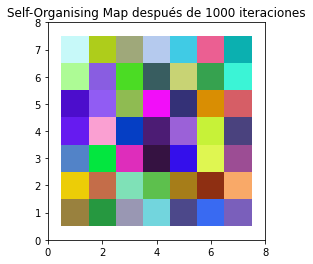

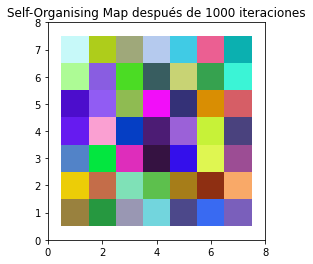

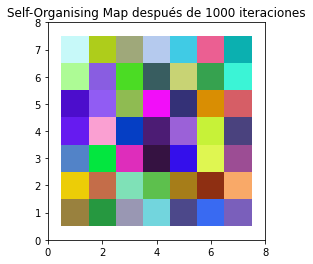

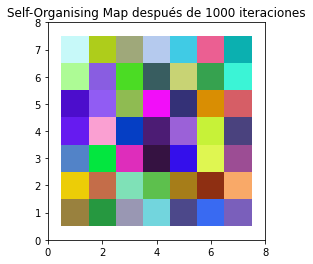

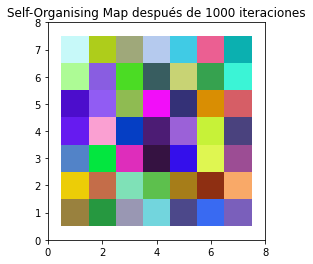

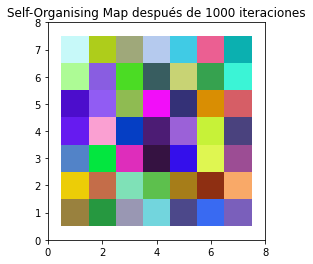

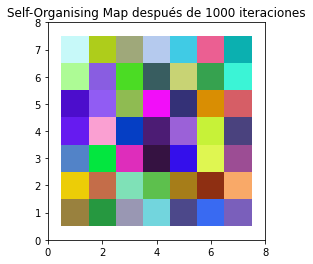

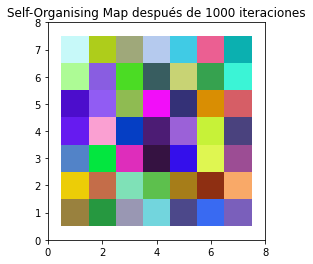

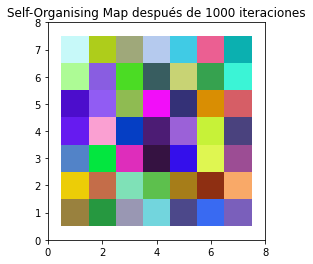

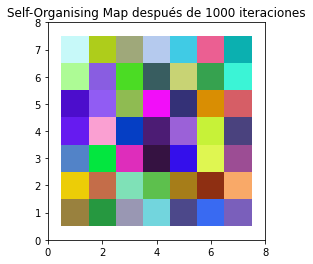

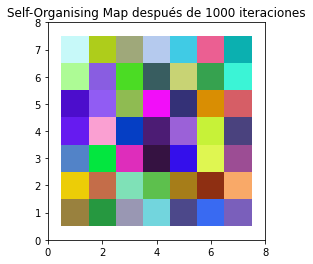

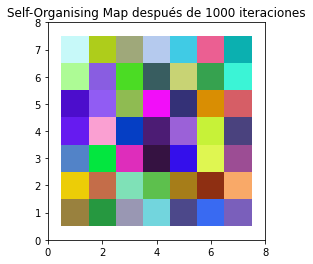

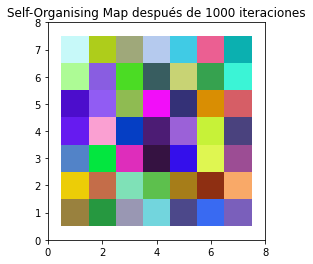

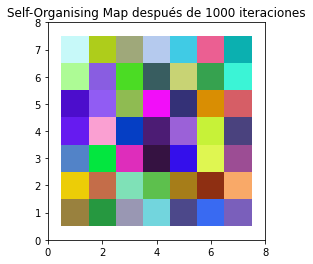

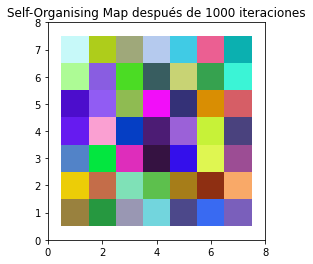

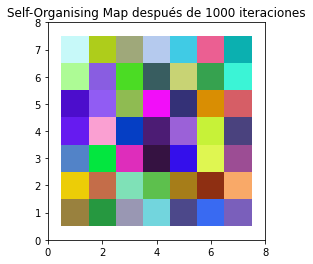

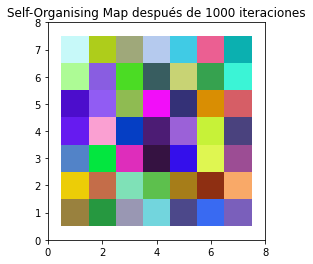

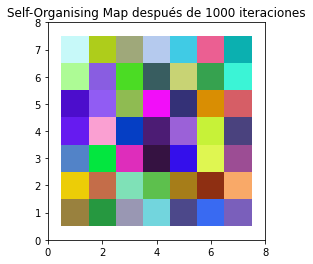

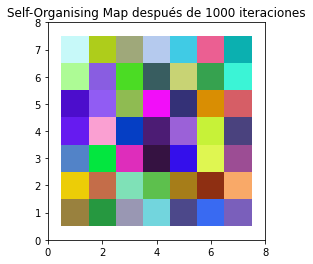

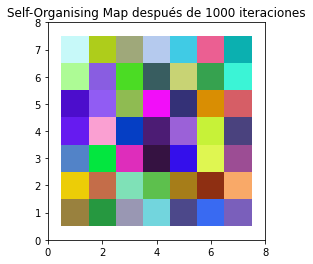

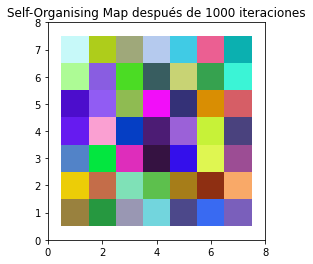

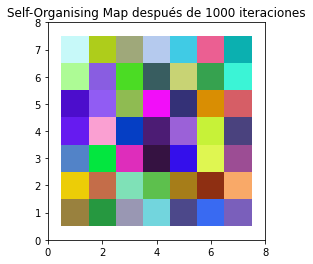

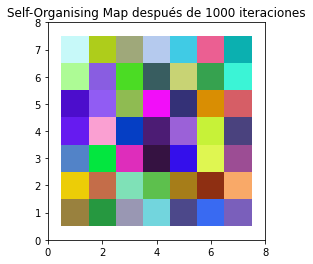

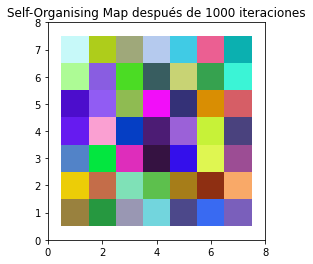

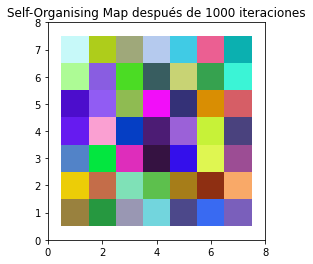

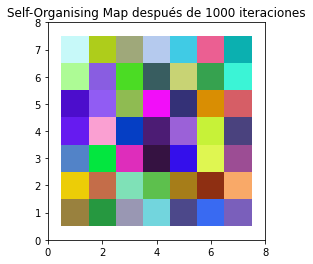

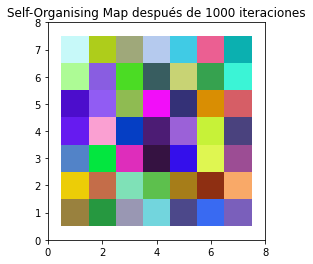

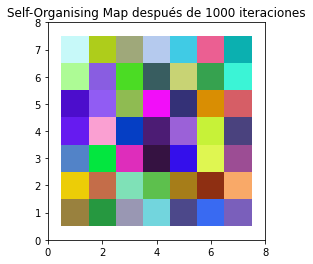

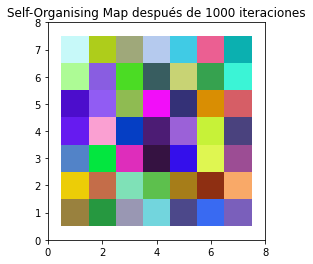

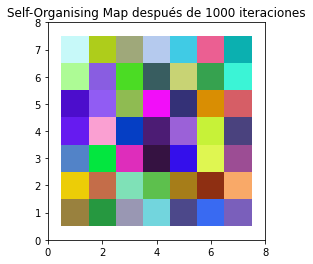

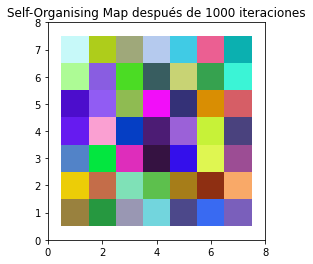

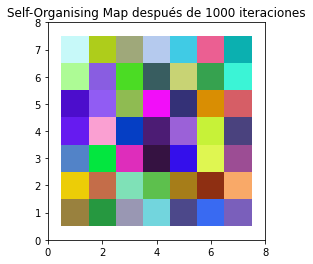

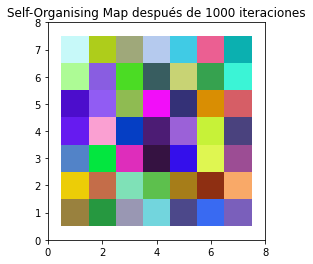

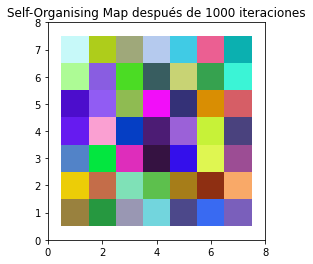

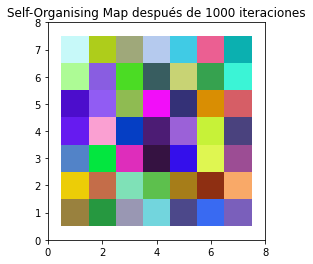

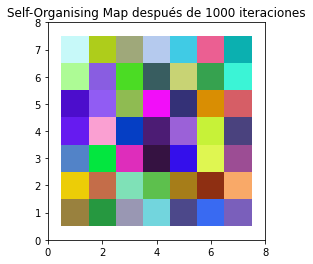

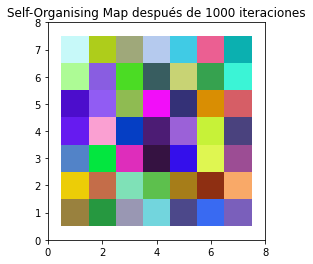

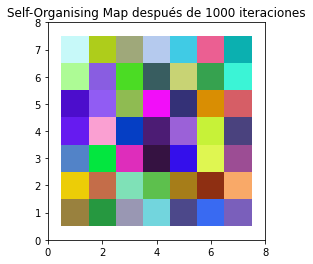

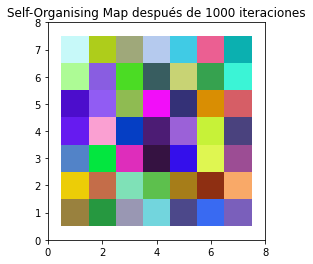

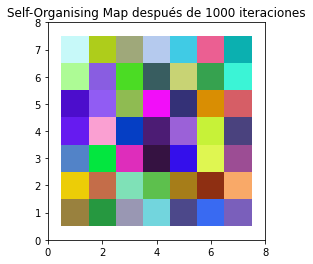

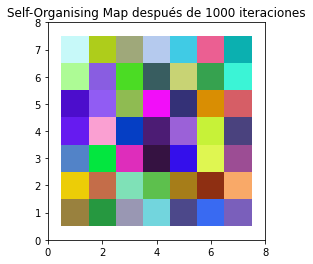

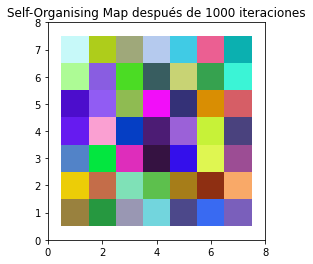

100


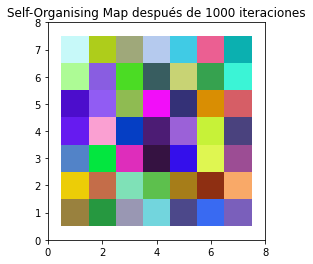

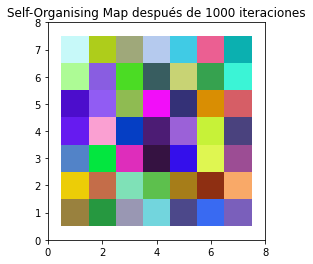

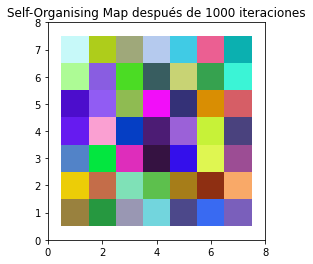

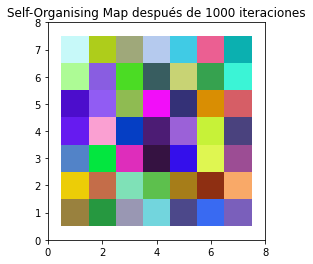

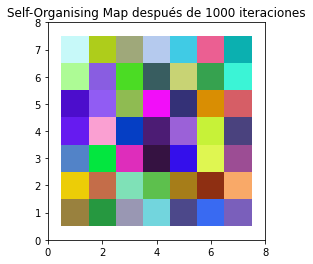

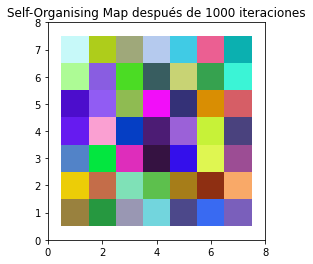

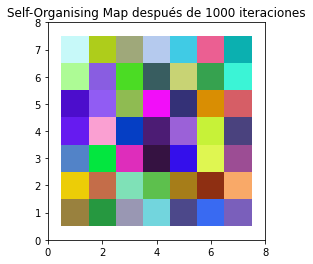

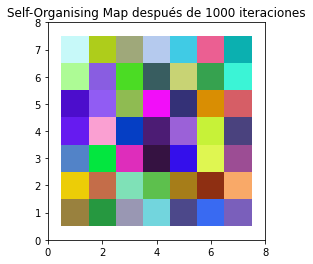

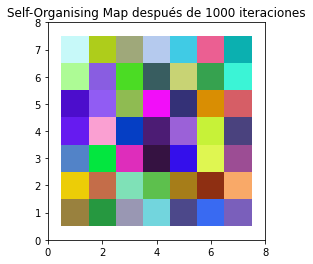

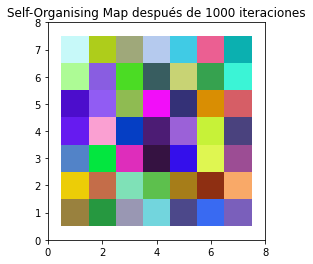

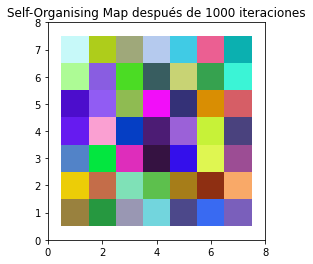

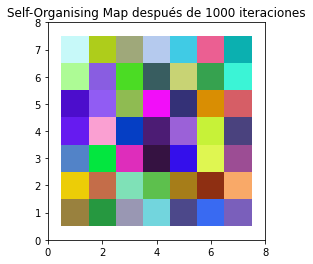

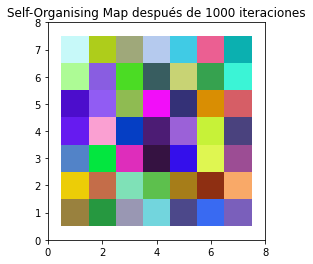

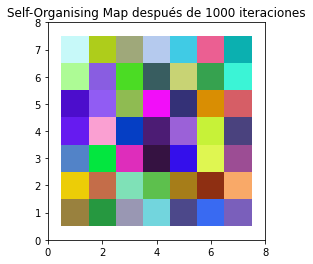

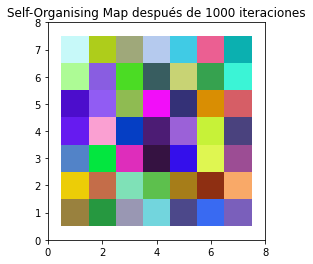

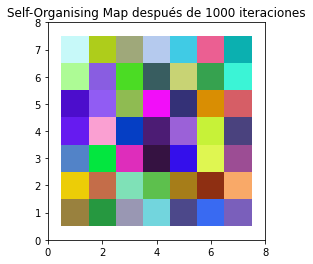

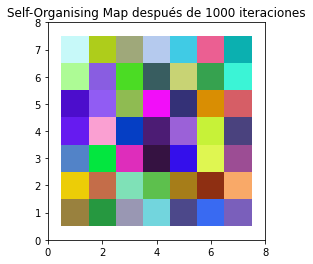

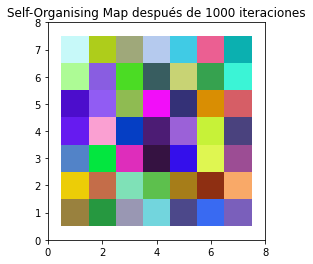

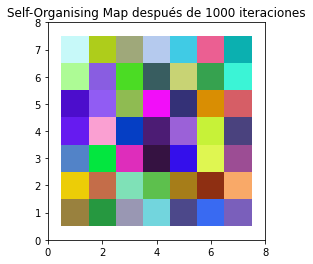

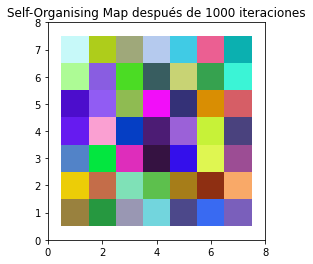

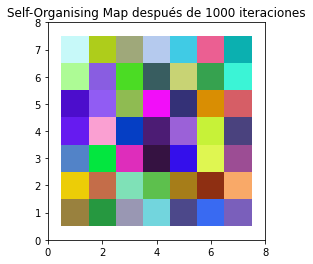

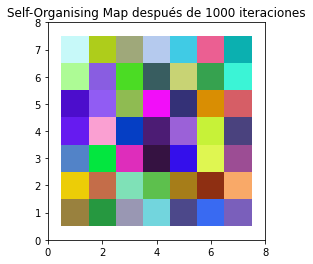

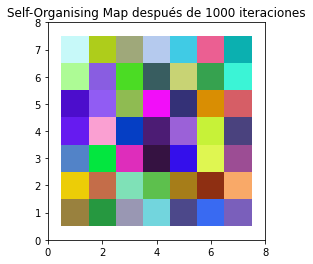

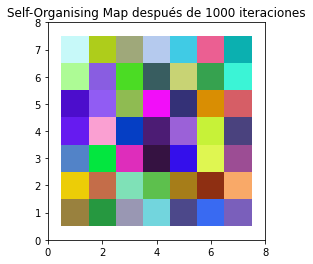

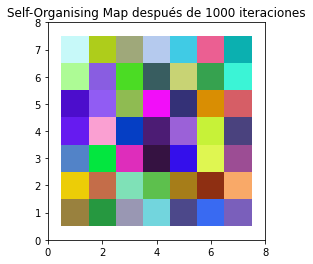

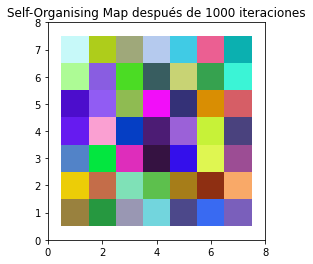

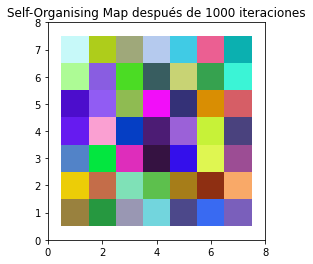

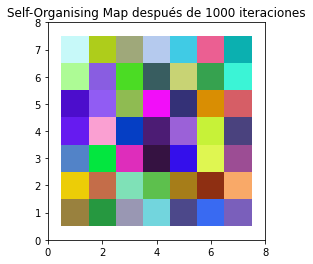

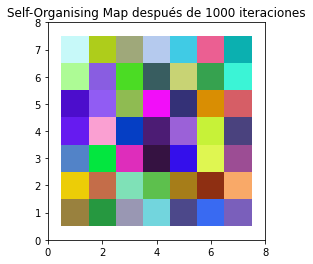

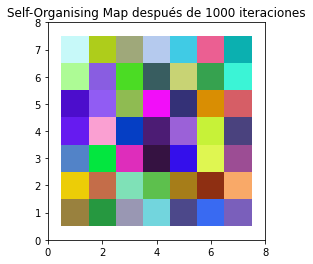

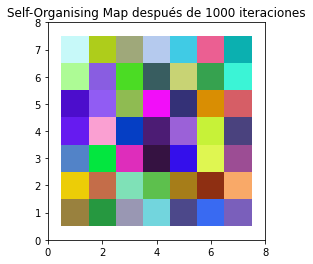

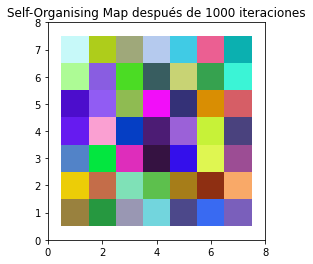

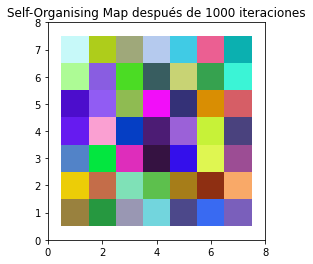

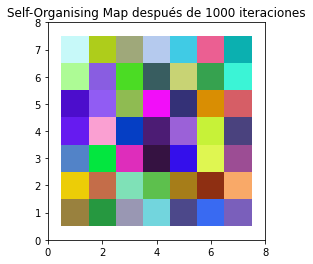

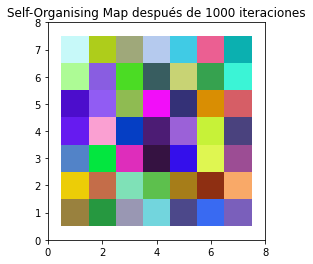

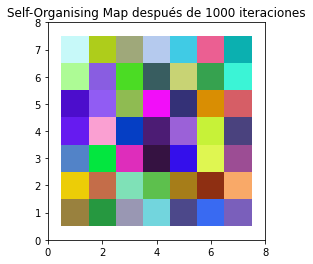

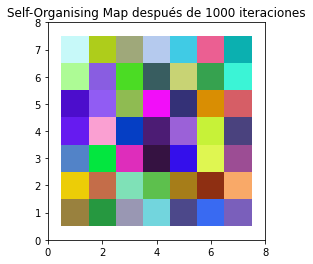

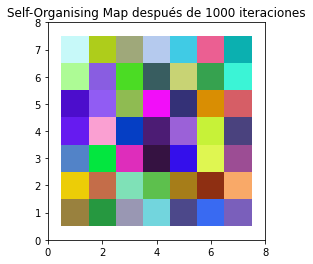

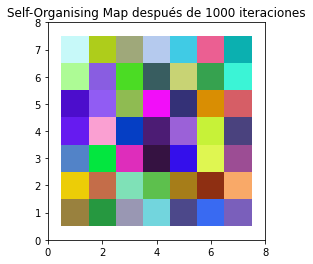

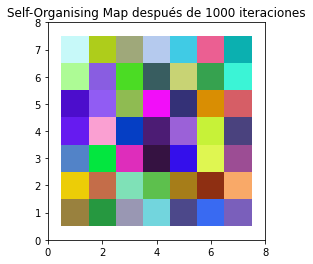

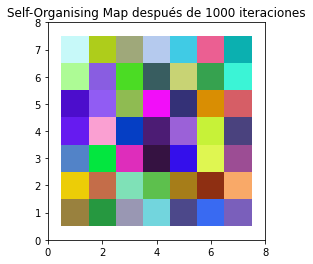

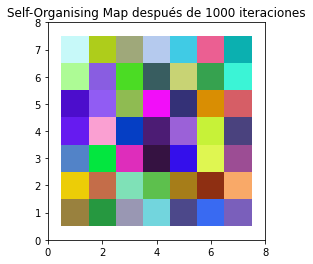

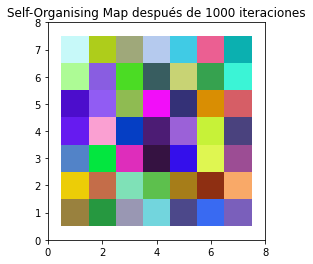

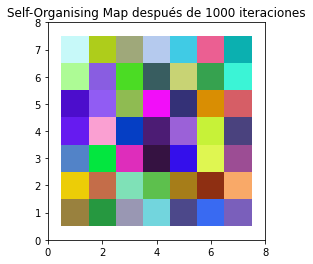

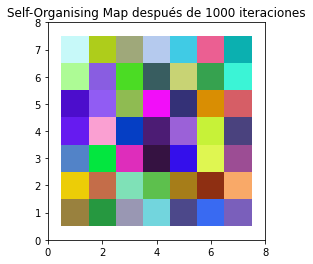

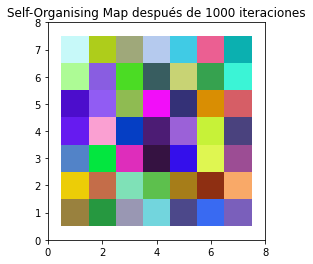

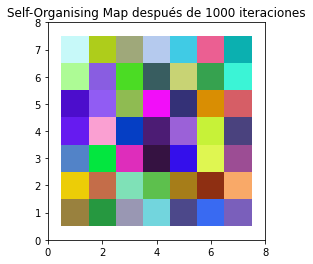

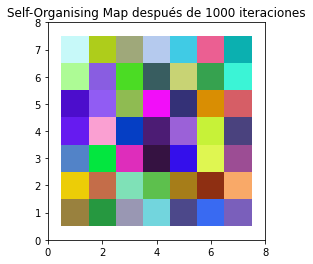

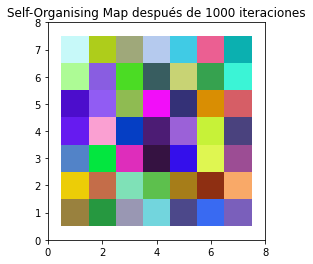

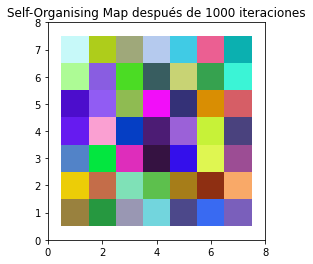

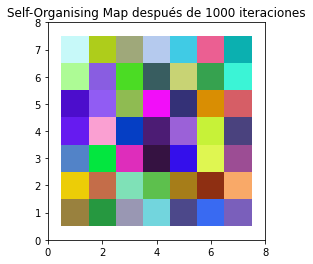

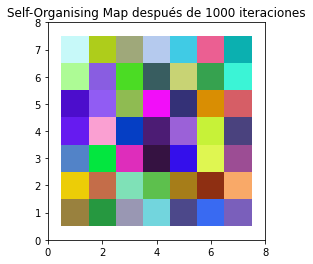

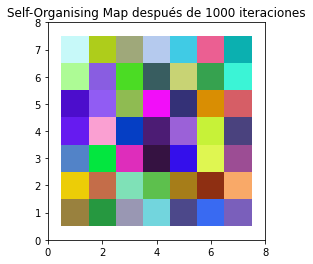

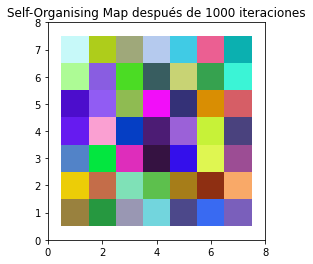

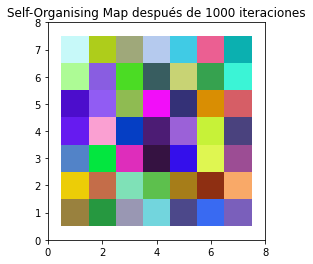

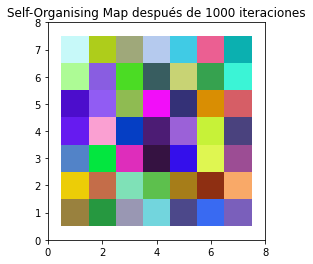

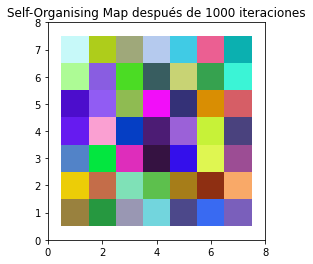

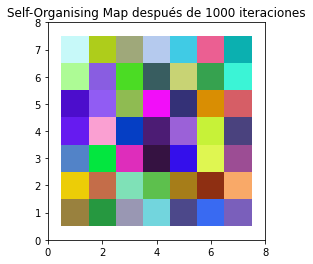

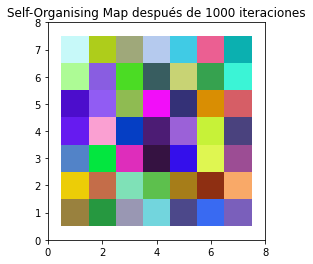

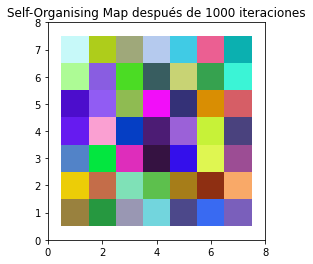

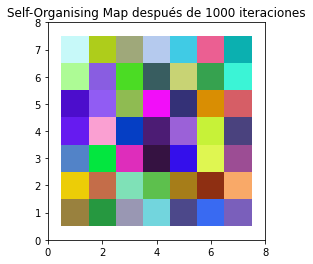

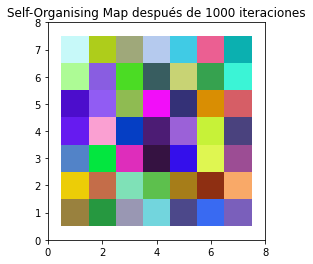

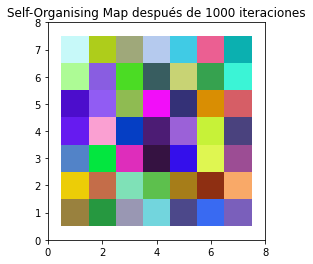

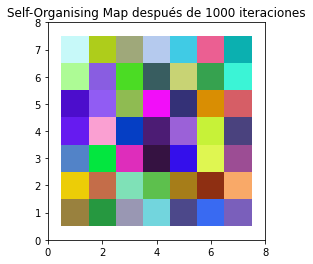

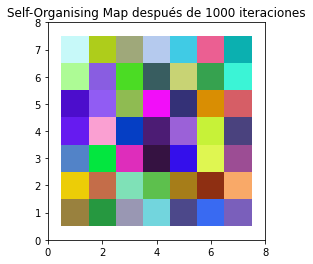

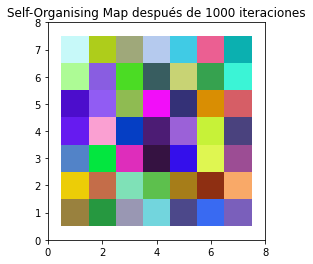

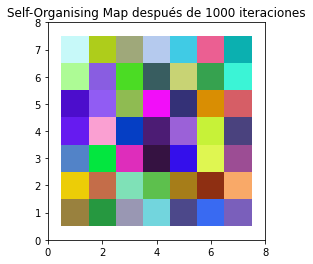

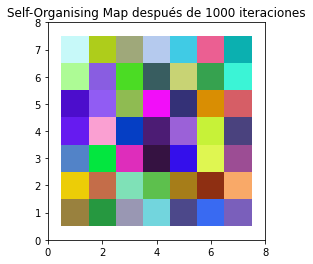

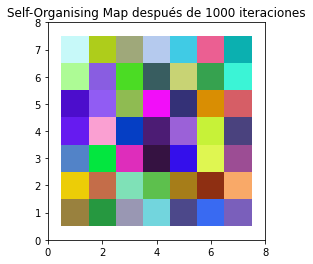

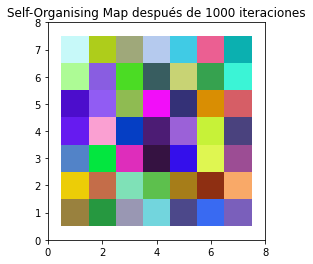

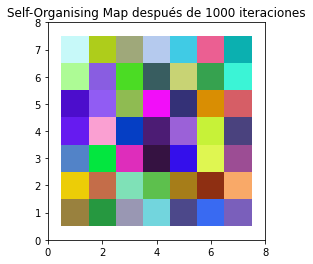

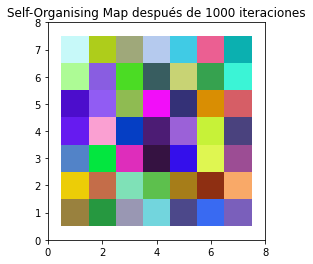

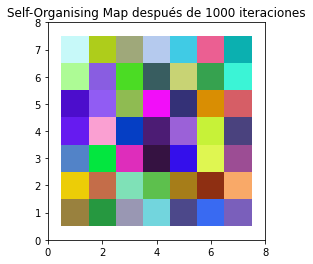

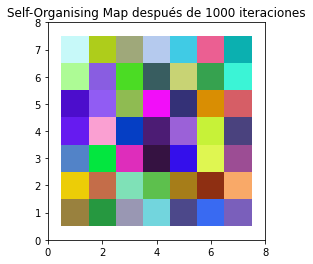

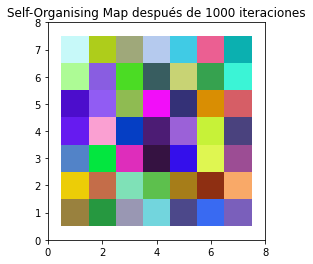

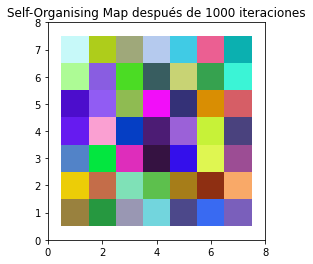

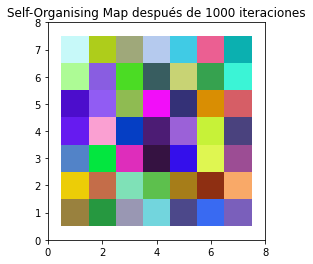

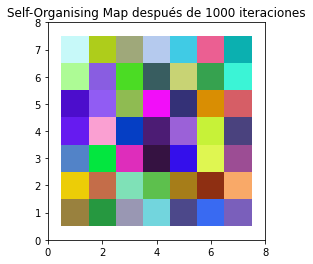

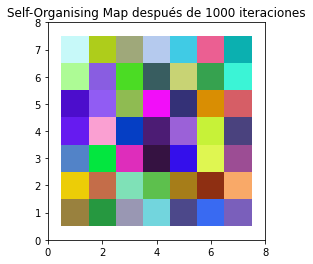

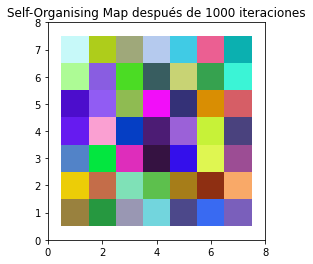

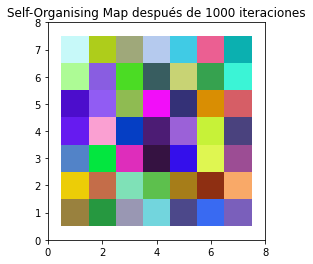

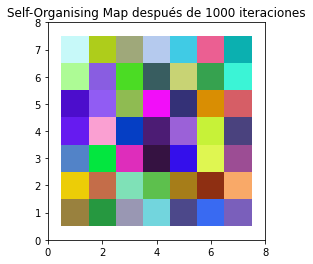

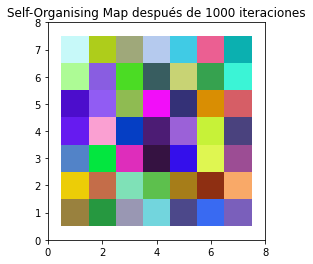

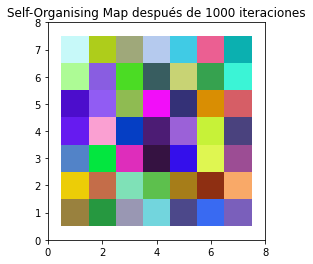

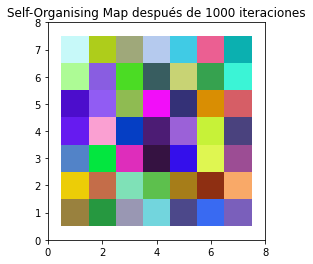

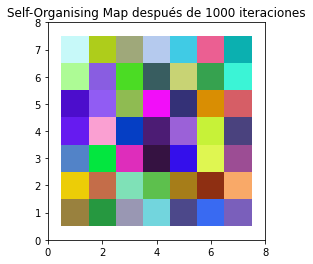

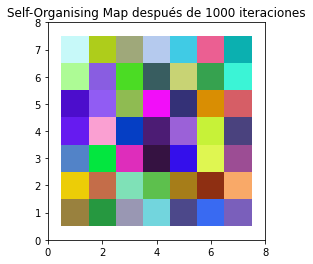

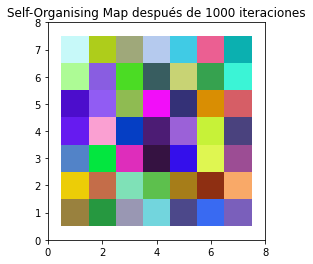

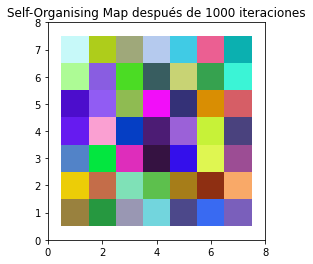

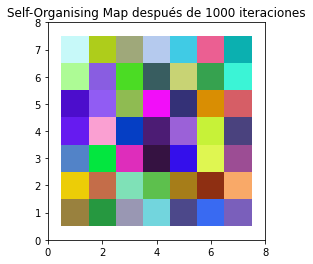

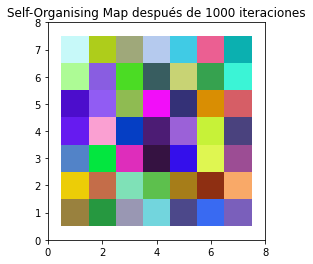

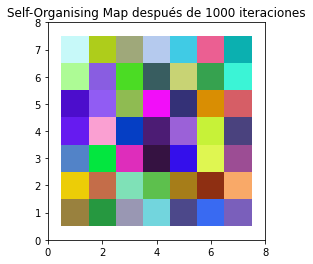

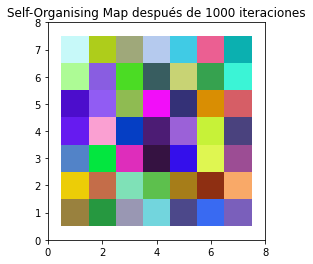

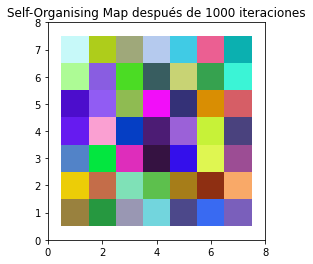

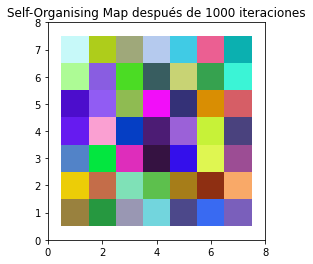

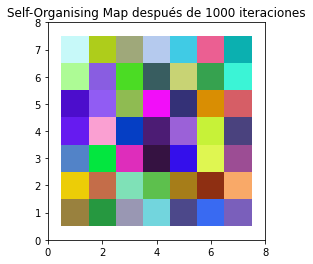

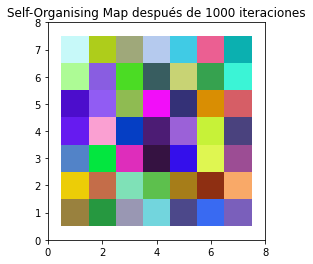

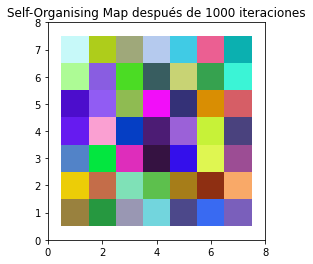

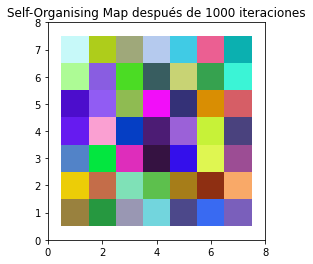

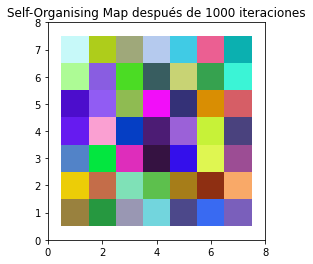

200


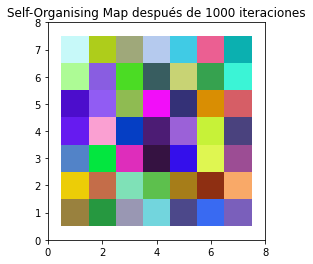

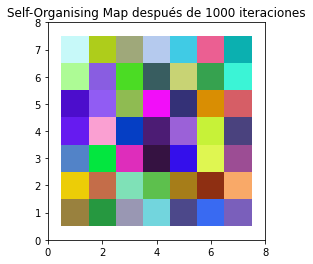

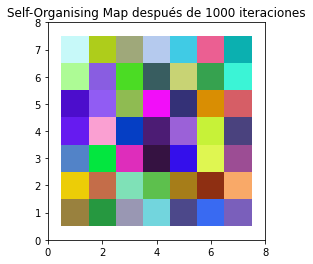

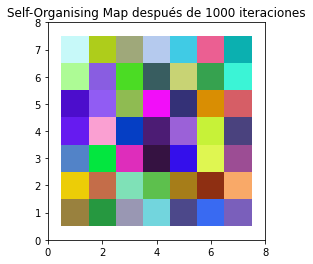

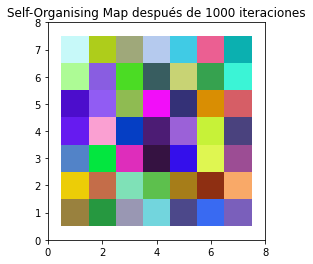

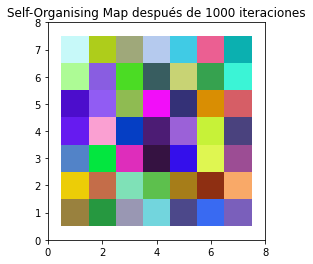

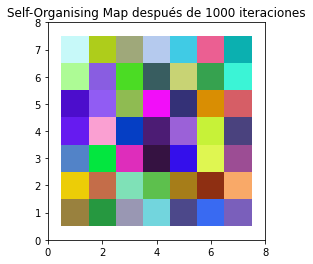

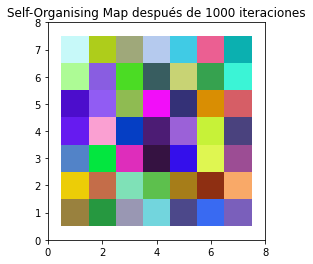

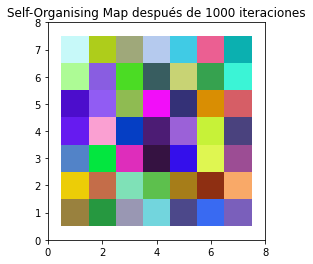

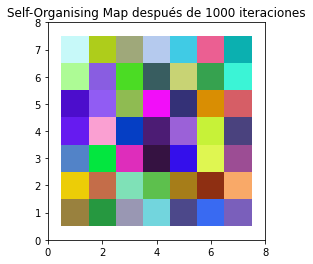

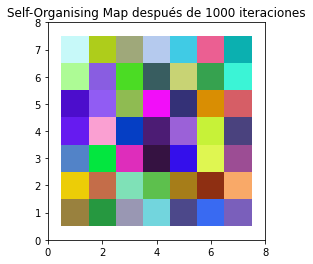

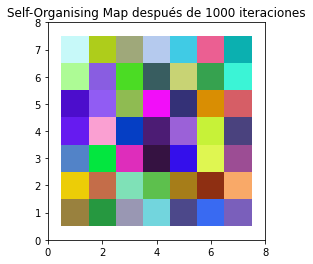

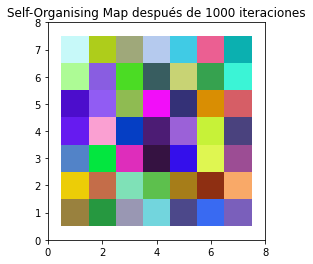

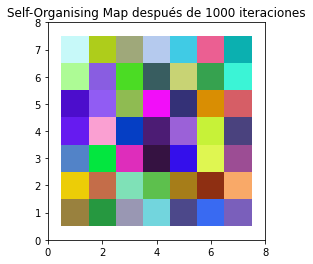

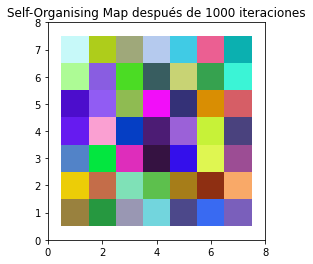

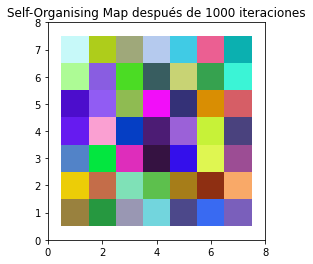

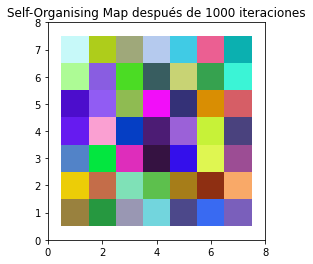

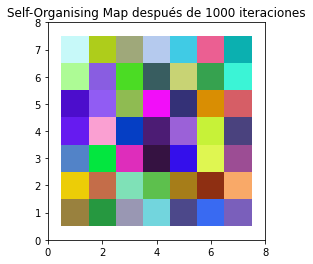

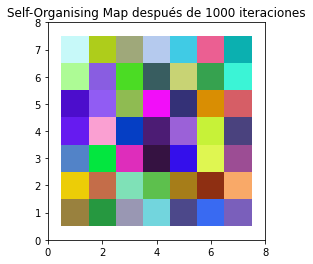

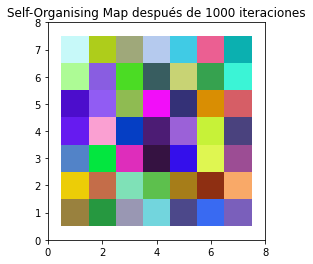

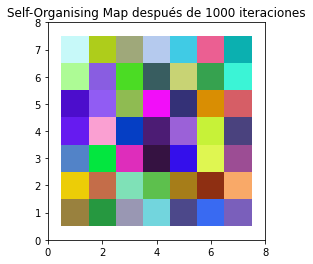

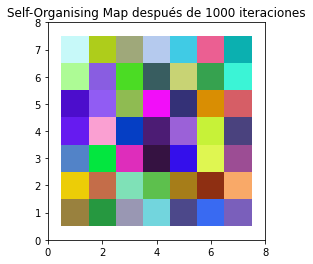

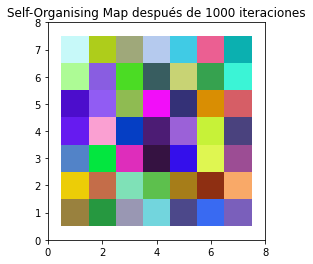

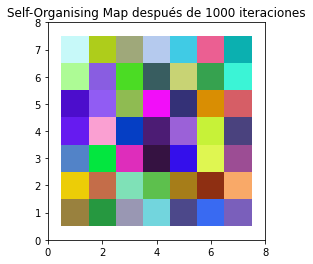

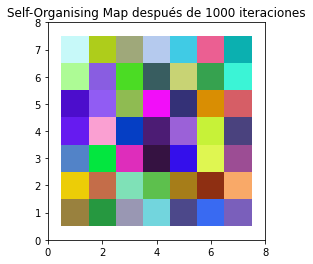

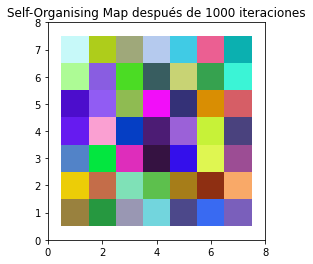

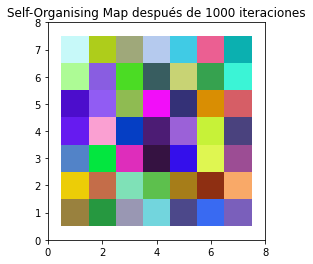

KeyboardInterrupt: 

<Figure size 432x288 with 0 Axes>

In [20]:
# Entrena la red con el dataset de entrenamiento
for x in range(periodo):
    pintar_mapa(matriz_pesos)
    if x % 100 == 0:
        print(x)
    
    

## SOM Clasificación

In [ ]:
# Clasifica los patrones de entrenamiento con la matriz de pesos recién entrenada



## SOM Prueba

In [ ]:
# Clasifica nuevos patrones

